In [1]:
import warnings
warnings.filterwarnings("ignore")

# 🕹 Jupyter Widgets

<br>

EOmaps provides a set of pre-configured [Jupyter Widgets][jupyter_widgets] that can be used to create interactive browser controls for a map. 

These widgets work just like any other [Jupyter Widgets][jupyter_widgets], but they have a pre-configured handler to perform commonly used tasks (switching layers, overlay layers, add/remove callbacks etc.)


:::::{note}

Widgets are intended for **Jupyter Notebooks** and require the additional dependencies: `ipywidgets` and `ipympl`.  
They will only work if you use the interactive [ipympl (widget) backend][ipympl]. To activate, use the ``%matplotlib widget`` magic command.

You can install the required additional dependencies with one of the following commands:
::::{tab-set}

:::{tab-item} pip
```
pip install ipywidgets, ipympl
```
:::
:::{tab-item} conda / mamba

```
conda install -c conda-forge ipywidgets, ipympl
```
or
```
mamba install -c conda-forge ipywidgets, ipympl
```
:::
::::
:::::

[jupyter_widgets]: https://ipywidgets.readthedocs.io
[ipympl]: https://matplotlib.org/ipympl/

## Layer selector widgets

Layer selector widgets can be used to change the visible layer of a map.

:::{dropdown} Available widgets
:open:

```{eval-rst}

.. currentmodule:: eomaps.widgets

.. autosummary:: 
   :nosignatures:
   
   LayerDropdown
   LayerSelect
   LayerSelectMultiple

.. autosummary:: 
   :nosignatures:

   LayerSelectionSlider
   LayerSelectionRangeSlider
   
.. autosummary:: 
   :nosignatures:

   LayerButton
   LayerRadioButtons
   LayerToggleButtons

.. autosummary:: 
   :nosignatures:
   
   LayerOverlaySlider

```
:::

### How to use the widgets

To attach a widget to a map, all you need to do is to pass the associated [`Maps`](eomaps.Maps) object as first argument on initialization.
(e.g. use ``Widget(m)`` to connect the widget to the [`Maps`](eomaps.Maps) object `m`)

In addition to the ipywidget-arguments, they support the following (optional) arguments:

- `layers`: A list of layer specs `[<specs 1>, <specs 2>, ...]` to use in the widget.  
  `<specs>`can be one of:
    - A single layer-name `"layer_name"` or a tuple `("layer_name", transparency)`
    - A tuple of multiple layer-names (and/or transparencies): `("layer_name_1", ("layer_name_2", 0.5), ...)`
    - A list of a custom labels and a layer-assignments: `["Custom label", <layer specs>]`


For example, here's how you can connect the available layer-selection widgets to the following map:

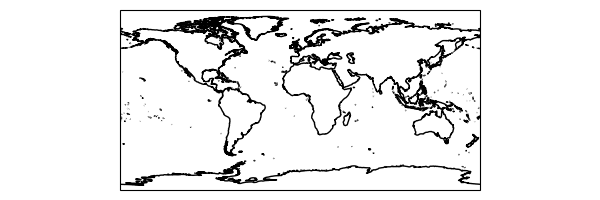

In [2]:
%matplotlib widget
from eomaps import Maps, widgets

m = Maps(figsize=(6, 2), layer="coastline")
m.add_feature.preset.coastline()

m.add_feature.preset.countries(layer="countries")
m.add_feature.preset.ocean(layer="ocean")
m.show()

#### Widgets to display a single specific layer

In [3]:
layer_button = widgets.LayerButton(m, layer="ocean", description="Show ocean layer")

In [4]:
display(layer_button)

LayerButton(description='Show ocean layer', style=ButtonStyle())

#### Widgets to select one layer of a list of layers

In [5]:
selector_widgets = [
    widgets.LayerToggleButtons(m),
    widgets.LayerRadioButtons(m),
    widgets.LayerSelect(m),
    widgets.LayerDropdown(m),
    widgets.LayerSelectionSlider(m)
]

In [6]:
display(*selector_widgets)

LayerToggleButtons(description='Layers', options=('coastline', 'countries', 'ocean'), value='coastline')

LayerRadioButtons(description='Layers', options=('coastline', 'countries', 'ocean'), value='coastline')

LayerSelect(description='Layers', options=('coastline', 'countries', 'ocean'), value='coastline')

LayerDropdown(description='Layers', options=('coastline', 'countries', 'ocean'), value='coastline')

LayerSelectionSlider(description='Layers', options=('coastline', 'countries', 'ocean'), value='coastline')

#### Widgets to overlay multiple layers

In [7]:
multi_selector_widgets = [
    widgets.LayerSelectMultiple(m),
    widgets.LayerSelectionRangeSlider(m)
]

In [8]:
display(*multi_selector_widgets)

LayerSelectMultiple(description='Layers', index=(0, 0), options=('coastline', 'countries', 'ocean'), value=('c…

LayerSelectionRangeSlider(description='Layers', index=(0, 0), options=('coastline', 'countries', 'ocean'), val…

:::{tip}
You can style the widgets as any other Jupyter Widget (more info in the [Widget Styling][widget_styling] section of the ipywidgets docs.)

To display widgets next to a figure, use the `canvas` of the figure:

```python
display(m.f.canvas, ... other widgets...)
```

To arrange widgets, checkout the [container and Layout widgets][container_widgets] like `HBox([list of widgets])`, `VBox([list of widgets])`!

:::

[container_widgets]: https://ipywidgets.readthedocs.io/en/7.6.3/examples/Widget%20List.html#Container/Layout-widgets
[widget_styling]: https://ipywidgets.readthedocs.io/en/7.6.2/examples/Widget%20Styling.html

In [9]:
from ipywidgets import HBox, VBox

In [10]:
custom_selector = widgets.LayerSelectMultiple(
    m,
    layers=[["A nice coastline", "coastline"], 
            ["Overlay 'coastline' + 'ocean'", ("coastline", "ocean")],
            ["Transparent overlay: 'coastline' + 'ocean'", ("coastline", ("ocean", 0.4))]
           ],
    layout=dict(width='35%', height='80px', )
)

In [11]:
display(HBox([custom_selector, m.f.canvas]))

In [12]:
buttons = [
    widgets.LayerButton(m, layer="ocean", description="Show ocean layer", layout=dict(width="25ex", height="5ex")),
    widgets.LayerButton(m, layer="coastline", description="Show coastline layer", layout=dict(width="25ex", height="5ex"))
]
for b in buttons:
    b.style.font_weight = 'bold'
    b.style.font_size = '20px'
buttons[0].style.button_color = 'lightblue'
buttons[1].style.button_color = '#d0a2b9'


In [13]:
display(HBox([VBox(buttons), m.f.canvas]))

## Callback Widgets

Callback widgets are used to toggle callbacks on a map.

:::{dropdown} Available Widgets:
:open:

```{eval-rst}

.. currentmodule:: eomaps.widgets

.. autosummary:: 
   :nosignatures:
   
   ClickAnnotateCheckbox
   ClickMarkCheckbox
   ClickPrintToConsoleCheckbox
   ClickPeekLayerCheckbox


.. autosummary:: 
   :nosignatures:
   
   ClickMarkCheckbox
   ClickPrintToConsoleCheckbox


.. autosummary:: 
   :nosignatures:
   
   PickAnnotateCheckbox
   PickMarkCheckbox
   PickPrintToConsoleCheckbox

:::

### How to use the widgets

To attach a widget to a map, all you need to do is to pass the associated [`Maps`](eomaps.Maps) object as first argument on initialization.
(e.g. use ``Widget(m)`` to connect the widget to the [`Maps`](eomaps.Maps) object `m`)

All additional arguments will be passed to the corresponding callback (e.g. `m.cb.< METHOD >.attach.< NAME >(**kwargs)`)

In [14]:
checkboxes = [
    widgets.ClickAnnotateCheckbox(m),
    widgets.ClickMarkCheckbox(m),
    widgets.ClickPrintToConsoleCheckbox(m),
    widgets.ClickPeekLayerCheckbox(m, layer="ocean"),
    widgets.ClickMarkCheckbox(m),
    widgets.ClickPrintToConsoleCheckbox(m),
    widgets.PickAnnotateCheckbox(m),
    widgets.PickMarkCheckbox(m),
    widgets.PickPrintToConsoleCheckbox(m)
]

In [15]:
display(*checkboxes)

ClickAnnotateCheckbox(value=False, description='Annotate (Click)')

ClickMarkCheckbox(value=False, description='Mark (Click)')

ClickPrintToConsoleCheckbox(value=False, description='Print (Click)')

ClickPeekLayerCheckbox(value=False, description="Peek Layer: 'ocean'")

ClickMarkCheckbox(value=False, description='Mark (Click)')

ClickPrintToConsoleCheckbox(value=False, description='Print (Click)')

PickAnnotateCheckbox(value=False, description='Annotate (Pick)')

PickMarkCheckbox(value=False, description='Mark (Pick)')

PickPrintToConsoleCheckbox(value=False, description='Print (Pick)')